# Analysis and Model creation for the German Credit Scoring Dataset

Dataset: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data 

Attribute 1:  (qualitative)      
 Status of existing checking account
             A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM / salary assignments for at least 1 year
               A14 : no checking account

Attribute 2:  (numerical)
	      Duration in month

Attribute 3:  (qualitative)
	      Credit history
	      A30 : no credits taken/ all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paidx back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/  other credits existing (not at this bank)

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

Attribute 5:  (numerical)
	      Credit amount

Attibute 6:  (qualitative)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

Attribute 7:  (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

Attribute 8:  (numerical)
	      Installment rate in percentage of disposable income

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

Attribute 10: (qualitative)
	      Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

Attribute 11: (numerical)
	      Present residence since

Attribute 12: (qualitative)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/ life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

Attribute 13: (numerical)
	      Age in years

Attribute 14: (qualitative)
	      Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

Attribute 15: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

Attribute 16: (numerical)
              Number of existing credits at this bank

Attribute 17: (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

Attribute 18: (numerical)
	      Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
	      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name

Attribute 20: (qualitative)
	      foreign worker
	      A201 : yes
	      A202 : no

Import dataset from uc api:


In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 

In [3]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [4]:
X = X.set_axis([
    'Checking_Account_Status',
    'Duration_Months',
    'Credit_History',
    'Purpose',
    'Credit_Amount',
    'Savings_Account',
    'Employment_Since',
    'Installment_Rate',
    'Personal_Status_Sex',
    'Other_Debtors_Guarantors',
    'Residence_Since',
    'Property',
    'Age_Years',
    'Other_Installment_Plans',
    'Housing',
    'Number_Credits',
    'Job',
    'Number_Liable_People',
    'Telephone',
    'Foreign_Worker'
], axis=1)

code_mapping = {
    'A11': 'smaller 0 DM',
    'A12': 'smaller 200 DM',
    'A13': 'greater 200 DM',
    'A14': 'no checking account',
    'A30': 'no credits taken/ all credits paid back duly',
    'A31': 'all credits at this bank paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/other credits existing (not at this bank)',
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others',
    'A61': '< 100 DM',
    'A62': '< 500 DM',
    'A63': '< 1000 DM',
    'A64': '>= 1000 DM',
    'A65': 'unknown/no savings account',
    'A71': 'unemployed',
    'A72': '< 1 year',
    'A73': '< 4 years',
    'A74': '7 years',
    'A75': '>= 7 years',
    'A91': 'male : divorced/separated',
    'A92': 'female : divorced/separated/married',
    'A93': 'male : single',
    'A94': 'male : married/widowed',
    'A95': 'female : single',
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor',
    'A121': 'real estate',
    'A122': 'if not A121 : building society savings agreement/ life insurance',
    'A123': 'if not A121/A122 : car or other, not in attribute 6',
    'A124': 'unknown/no property',
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none',
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free',
    'A171': 'unemployed/unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee / official',
    'A174': 'management/ self-employed/ highly qualified employee/ officer',
    'A191': 'none',
    'A192': 'yes, registered under the customers name',
    'A201': 'yes',
    'A202': 'no'
}


In [5]:
mapping_table = pd.DataFrame(list(code_mapping.items()), columns=['Code', 'Meaning'])
# Convert the code_mapping to a series for easier replacement
mapping_series = pd.Series(code_mapping)

# Replace the values in each column
decoded_data = X.replace(mapping_series)

In [6]:
pattern = r'(?P<Sex>male|female) : (?P<Relationship_Status>.+)'

# Extracting Sex and Relationship Status into new columns
extracted_data = decoded_data['Personal_Status_Sex'].str.extract(pattern)

# Now add these new columns back to your original DataFrame
decoded_data['Sex'] = extracted_data['Sex']
decoded_data['Relationship_Status'] = extracted_data['Relationship_Status']

# Optionally, you may want to drop the original 'Personal_Status_Sex' column
decoded_data = decoded_data.drop(columns=['Personal_Status_Sex'])

In [7]:
decoded_data

,Checking_Account_Status,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Other_Debtors_Guarantors,Residence_Since,...,Age_Years,Other_Installment_Plans,Housing,Number_Credits,Job,Number_Liable_People,Telephone,Foreign_Worker,Sex,Relationship_Status
0,smaller 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/no savings account,>= 7 years,4,none,4,...,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,male,single
1,smaller 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,< 4 years,2,none,2,...,22,none,own,1,skilled employee / official,1,none,yes,female,divorced/separated/married
2,no checking account,12,critical account/other credits existing (not a...,education,2096,< 100 DM,7 years,2,none,3,...,49,none,own,1,unskilled - resident,2,none,yes,male,single
3,smaller 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,7 years,2,guarantor,4,...,45,none,for free,1,skilled employee / official,2,none,yes,male,single
4,smaller 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,< 4 years,3,none,4,...,53,none,for free,2,skilled employee / official,2,none,yes,male,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,< 100 DM,7 years,3,none,4,...,31,none,own,1,unskilled - resident,1,none,yes,female,divorced/separated/married
996,smaller 0 DM,30,existing credits paid back duly till now,car (used),3857,< 100 DM,< 4 years,4,none,4,...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes,male,divorced/separated
997,no checking account,12,existing credits paid back duly till now,radio/television,804,< 100 DM,>= 7 years,4,none,4,...,38,none,own,1,skilled employee / official,1,none,yes,male,single
998,smaller 0 DM,45,existing credits paid back duly till now,radio/television,1845,< 100 DM,< 4 years,4,none,4,...,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,male,single


In [8]:
decoded_data["Checking_Account_Status"].value_counts()

Checking_Account_Status
no checking account    394
smaller 0 DM           274
smaller 200 DM         269
greater 200 DM          63
Name: count, dtype: int64

1 - Good 
2 - Bad

In [16]:
result = pd.concat([decoded_data, y], axis=1)
new_column_name = 'Credit_Score'
result = result.rename(columns={result.columns[-1]: new_column_name})
result['Credit_Score'].replace(2, 0, inplace=True)

In [17]:
result['Credit_Score'].value_counts()

Credit_Score
1    700
0    300
Name: count, dtype: int64

In [18]:
pivot_table = result.pivot_table(index='Purpose', columns='Credit_Score', aggfunc='size', fill_value=0)
pivot_table

Credit_Score,0,1
Purpose,,
business,34,63
car (new),89,145
car (used),17,86
domestic appliances,4,8
education,22,28
furniture/equipment,58,123
others,5,7
radio/television,62,218
repairs,8,14


In [20]:
pivot_table = result.pivot_table(index=['Duration_Months'], columns='Credit_Score', aggfunc='size', fill_value=0)
pivot_table

Credit_Score,0,1
Duration_Months,,
4,0,6
5,0,1
6,9,66
7,0,5
8,1,6
9,14,35
10,3,25
11,0,9
12,49,130


There could be several reasons why these applications are regarded as good:

Risk-Based Pricing: The bank may be using risk-based pricing strategies where they offer credit to individuals with a higher risk profile but at a higher interest rate. This compensates for the increased risk while expanding their customer base.

Comprehensive Credit Assessment: The bank may have a more comprehensive credit assessment system that looks beyond just the existence of a critical account. Other factors such as income, employment stability, assets, savings, or even improvements in recent financial behavior could contribute positively to an applicant's credit score.

Market Positioning and Strategy: The bank might be aiming to increase its market share or enter a new market segment. By accepting customers with less-than-perfect credit histories, the bank could be trying to position itself as more inclusive and willing to offer a second chance to individuals who have faced financial difficulties in the past.

Successful Rehabilitation: Some of those with critical accounts might have demonstrated a significant improvement in their financial behavior. For example, they might have settled their previously outstanding debts or shown a consistent pattern of responsible financial behavior in recent times.

Data Limitations: The classification as 'good' might be due to limitations in the data. For instance, the bank might not have a long enough credit history for these customers, or there might be missing variables that are not accounted for in the dataset.

Competition and Customer Acquisition: In highly competitive markets, banks might be more willing to take on higher-risk customers to expand their customer base, especially if they have strategies in place to manage and mitigate these risks.



# Risky Customers

In [13]:
risky_customers = result[result['Credit_History'] == 'critical account/other credits existing (not at this bank)']
pivot_table = risky_customers.pivot_table(index=['Purpose'], columns='Credit_Score', aggfunc='size', fill_value=0)
pivot_table

Credit_Score,1,2
Purpose,,
business,17,2
car (new),59,19
car (used),32,4
domestic appliances,1,0
education,13,6
furniture/equipment,40,10
others,2,1
radio/television,73,7
repairs,5,1


In [14]:
pivot_table = risky_customers.pivot_table(index=['Housing','Other_Debtors_Guarantors'], columns='Credit_Score', aggfunc='size', fill_value=0)
pivot_table

Credit_Score                         1   2
Housing  Other_Debtors_Guarantors         
for free none                       23   7
own      co-applicant                7   2
         guarantor                   7   2
         none                      179  29
rent     co-applicant                2   2
         guarantor                   1   2
         none                       24   6

In [15]:
y['class'].replace(2, 0, inplace=True)

/var/folders/2c/z3p48tbs7ts01ct6t7gpsh3c0000gn/T/ipykernel_23654/956014390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'].replace(2, 0, inplace=True)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import re


X = pd.get_dummies(decoded_data, columns=['Checking_Account_Status', 'Credit_History', 'Purpose', 'Savings_Account', 'Employment_Since','Other_Debtors_Guarantors', 'Property', 'Other_Installment_Plans', 'Housing', 'Job', 'Telephone', 'Foreign_Worker', 'Sex', 'Relationship_Status' ])

# Split your data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]



NameError: name 'decoded_data' is not defined

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [25, 40, 50, 100, 200],
    'max_depth': [2, 3],
    'learning_rate': [0.01, 0.15, 0.1, 0.2]
}

# Initialize the XGBClassifier
model = xgb.XGBClassifier(objective='binary:logistic')

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Score: {best_score}")

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best Parameters: {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 25}
Best Score: 0.7642602985950626


In [18]:
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(learning_rate= 0.2, max_depth = 3, n_estimators = 25, objective='binary:logistic')
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Set Accuracy: {train_accuracy}")

Training Set Accuracy: 0.8585714285714285


In [19]:
from sklearn.metrics import accuracy_score

X_val.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.76


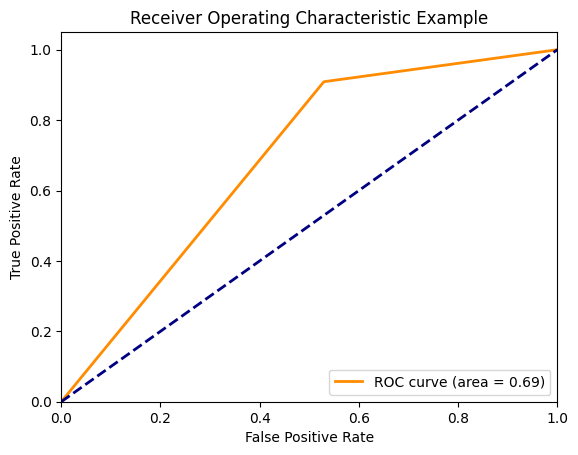

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_val)  # Replace X_val with your validation or test data

fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()




In [21]:
plt.show()

In [22]:
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(alpha = 0.1, learning_rate= 0.1, max_depth = 4, n_estimators = 100, objective='binary:logistic')
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Set Accuracy: {train_accuracy}")

Training Set Accuracy: 0.9414285714285714


In [23]:
from sklearn.metrics import accuracy_score

X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.76


In [24]:
# Retrain the model with the best parameters
best_params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
model = xgb.XGBClassifier(objective='binary:logistic', **best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7733333333333333
